# Credit Card Fraud Detection Dataset 2023


Rev 03

This project was made as the final project for the course: Deep Learning and Reinforcement Learning from IBM. 

The data set contains credit card transactions made by European cardholders in 2023, it was acquired in the website kaggle.com. According to the description in Kaggle, all data points have been filtered to not disclosure any sensitive and personal information of any of the cardholders. The dataset has over 550 thousand records, in Table 1 there are a few samples of the dataset.

In [2]:
#Import lib

import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split

import pathlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import PIL
from PIL import Image, ImageOps
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D

sns.set_context('notebook')
sns.set_style('white')

In [3]:
#import data
dataset = pd.read_csv('creditcard_2023.csv')

dataset.sample(10) # sample for checking how the data looks like

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
212222,212222,0.436164,-0.213978,0.294081,-0.292179,0.627071,0.459719,0.890220,-0.249472,0.355838,...,-0.091668,0.351390,-0.130721,0.700781,-1.492546,1.885096,-0.350489,-0.122550,20672.86,0
53099,53099,1.105209,-0.957392,0.579637,-1.448367,-0.224987,0.172459,0.145043,-0.161736,-0.432005,...,-0.162170,-0.320902,-0.105039,-0.061294,0.465195,-0.482137,-0.235280,-0.052135,23685.57,0
139050,139050,-0.212387,-0.091754,1.428908,0.042038,-0.079794,0.851382,0.180538,0.131006,0.341648,...,0.048843,1.065824,-0.066704,0.303171,-0.718955,0.000617,-0.374263,-0.079887,16804.56,0
12720,12720,0.754696,-0.433113,0.438823,-0.125691,0.491444,0.861226,0.488024,-0.107502,1.314418,...,-0.090576,0.218472,-0.051412,-1.185625,0.568393,-0.539891,-0.224516,-0.086625,14640.78,0
282286,282286,0.069119,-0.493589,1.235213,-2.244362,0.288397,0.722640,0.370307,-0.101492,-0.004210,...,0.111862,1.486476,-0.411645,0.344727,0.010122,-0.187462,-0.089030,0.226321,12176.28,0
209976,209976,-0.018285,-0.208015,1.708697,0.237803,0.970221,1.168527,0.540514,-0.092466,-0.085196,...,-0.020771,0.596902,-0.450787,-2.239784,-0.230534,0.206002,-0.277175,-0.293089,4020.44,0
124999,124999,-0.192747,-0.070264,0.407215,-0.066030,-0.307964,0.611449,0.998595,-0.019797,-0.085033,...,0.003810,0.605586,0.227988,1.182435,-0.815992,-0.741868,-0.286483,-0.133512,146.46,0
398396,398396,-0.046965,0.290038,-0.662254,0.553147,0.307311,-0.821718,-0.161439,-0.037485,-0.266735,...,-0.015823,-0.569944,-0.003769,-1.363233,0.841223,-0.821175,0.391024,0.248201,5223.40,1
414058,414058,-0.640266,-0.380552,-0.410088,0.622472,-0.386831,-0.518299,-0.204192,0.166139,-0.624061,...,0.314413,-0.081634,0.938695,0.390786,-0.002039,-0.603970,0.898050,0.443652,5360.87,1
125479,125479,1.089754,-0.364008,0.444100,-0.405251,0.224183,0.104879,0.426345,-0.169757,0.674586,...,-0.249683,-0.981006,0.018644,-0.898793,0.386310,0.350887,-0.274552,-0.053230,17318.30,0


**Description of the data according to Keggle:**

id: Unique identifier for each transaction

V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)

Amount: The transaction amount

Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [4]:
# checking data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
# remove 'id' data
dataset.drop(['id'], axis=1, inplace=True)

In [6]:
#check remaining columns
dataset.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'], dtype=object)

In [7]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Helper functions for Machine learning:

- Sigmoid: it's a mathematical function commonly used in ML and neural networks. It's very useful for binary classification problems - in which the output is a probability of the input to belong in the class. 

- Loss function (cost function): mathematical function that measures the difference between the predicted output (model output) and the data set target values. The main goal with the training is to minimize the loss value.

- Forward pass: function to pass the input data through the network to generate predictions. 

In [8]:
# Sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Loss funcion
def loss_fn(y_dataset, y_pred, eps=1e-16):
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_dataset * np.log(y_pred)) + np.sum((1-y_dataset)*np.log(1-y_pred)))/len(y_dataset)

# Forward pass function
# Returns predictions and gradient for the loss function
def forward_pass(W1, W2):
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

# VARIABLE ANALYSIS

In [9]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

Categorical variables:
['Class']


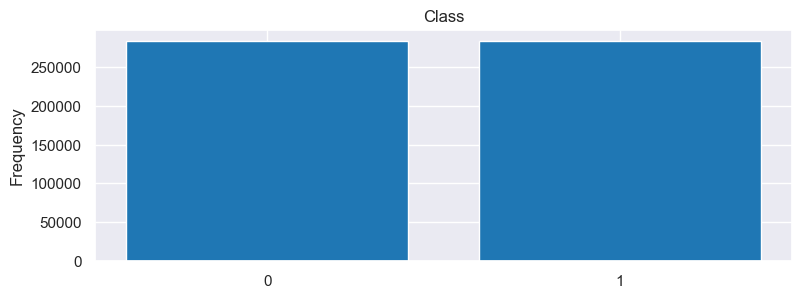

Class:
Class
0    284315
1    284315
Name: count, dtype: int64


In [10]:
categorical = (dataset.dtypes == "int64")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

# NUMERICAL VARIABLES

In [11]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

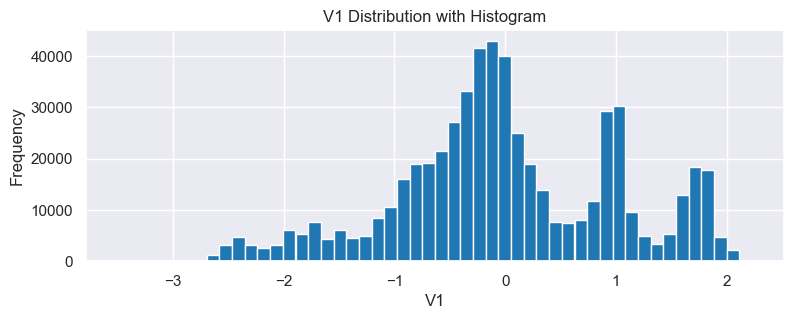

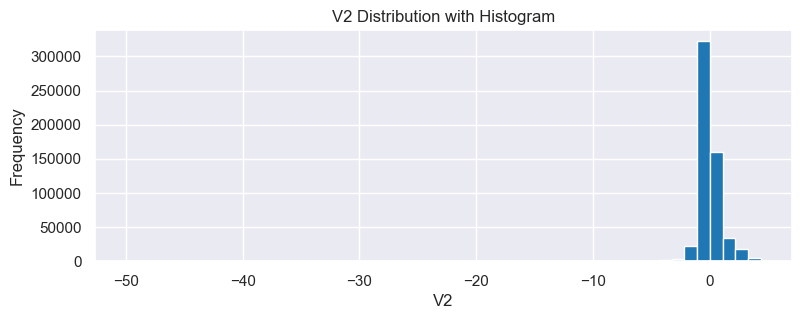

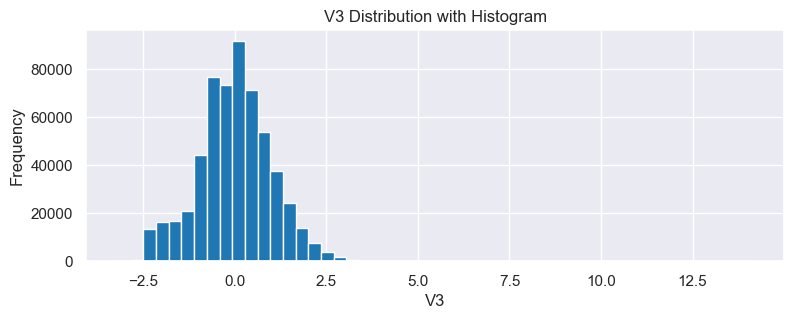

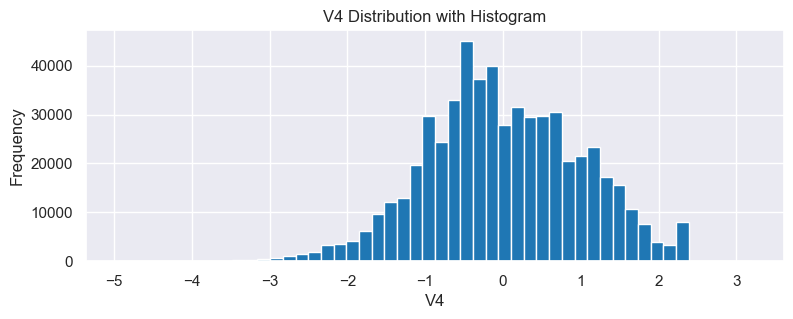

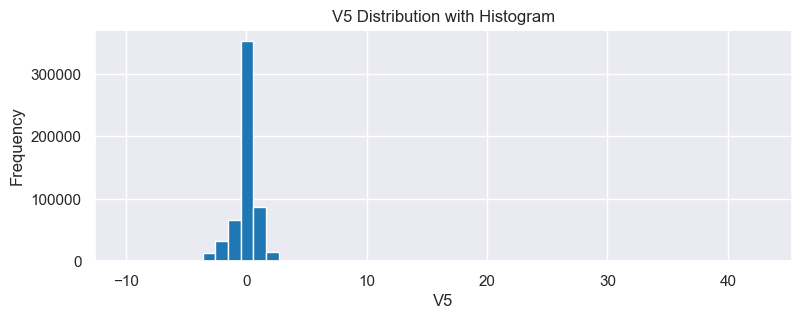

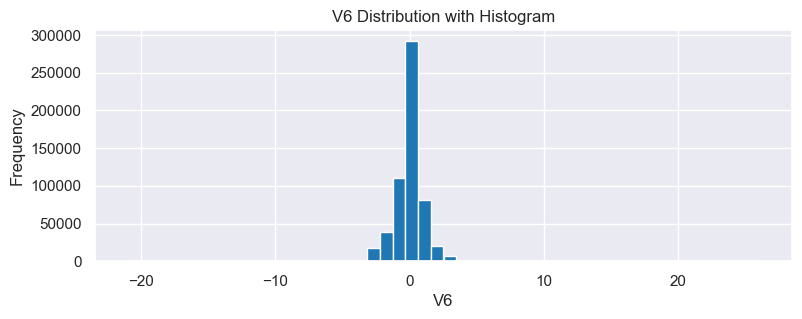

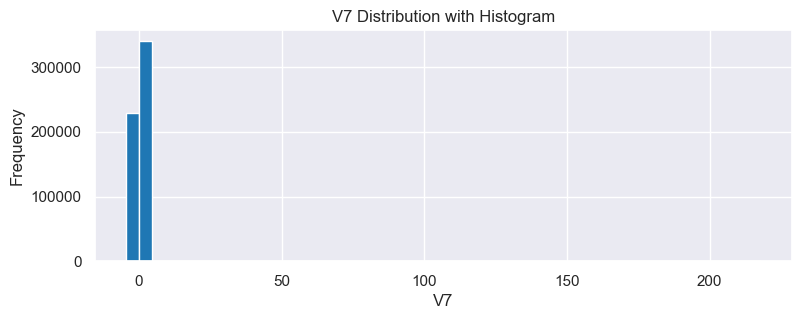

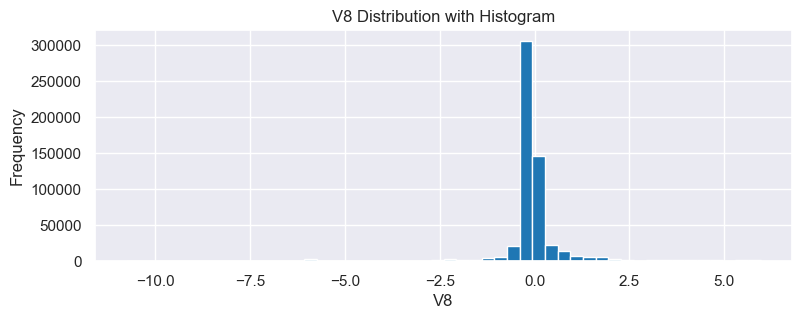

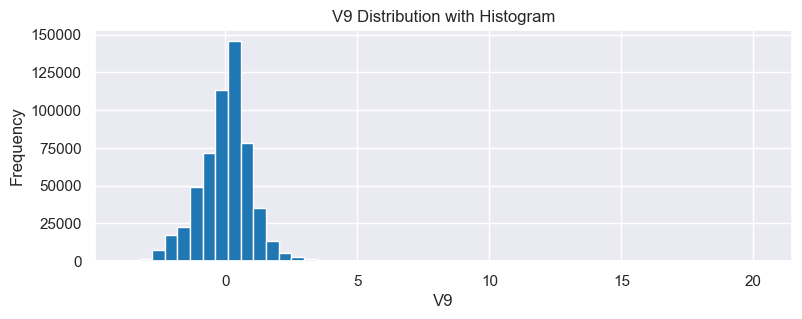

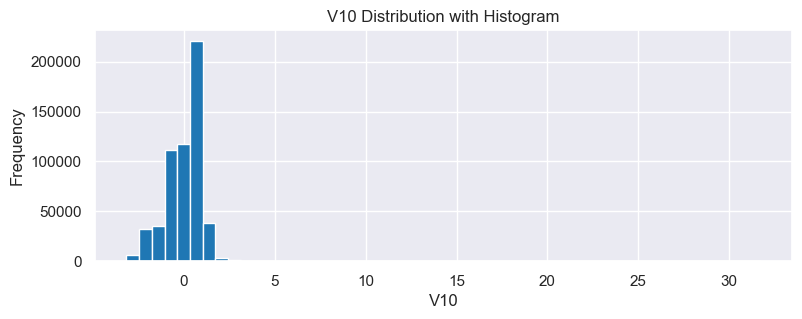

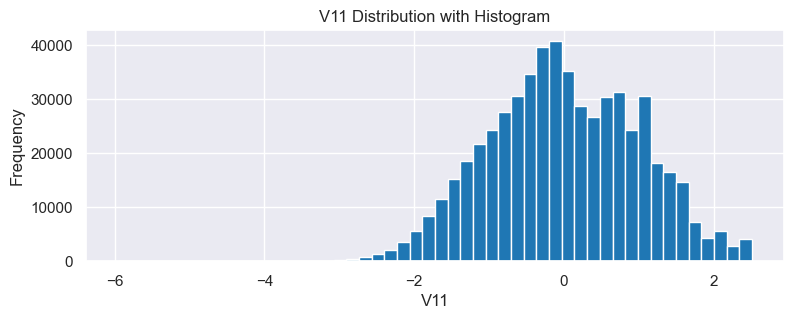

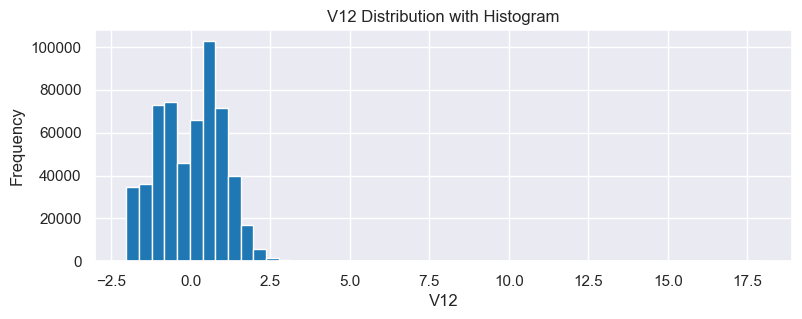

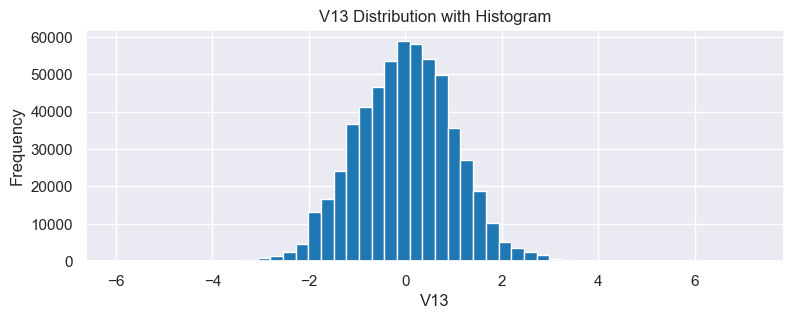

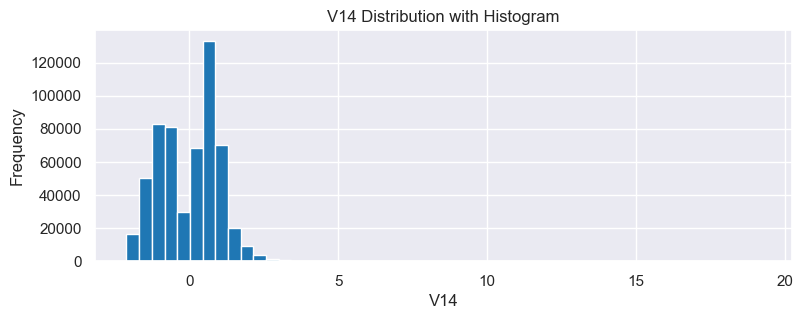

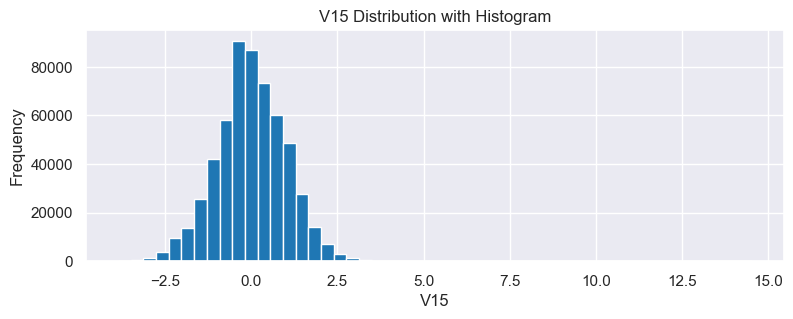

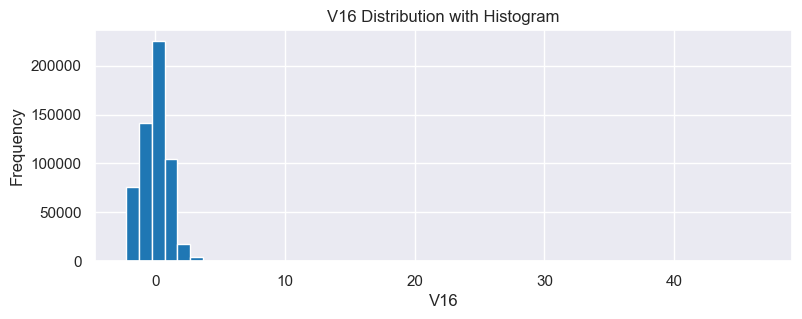

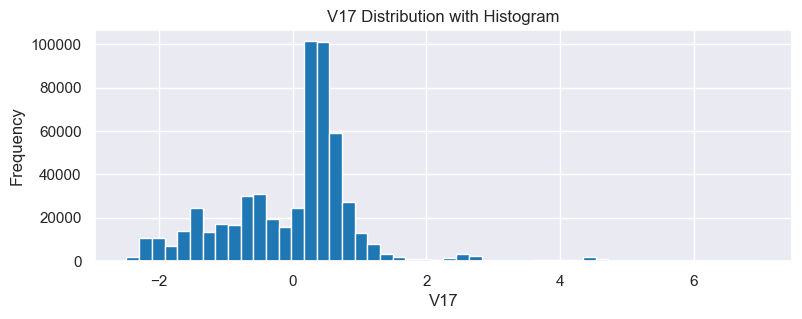

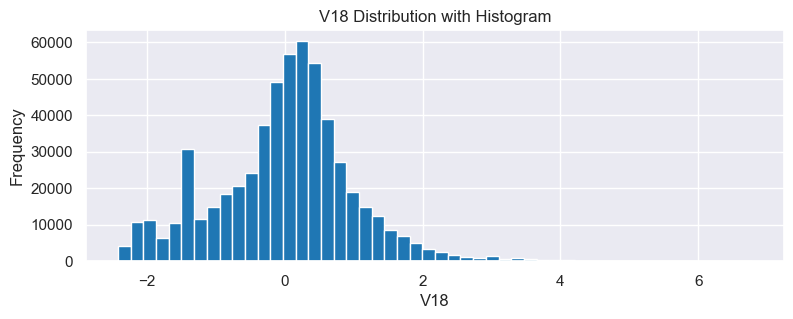

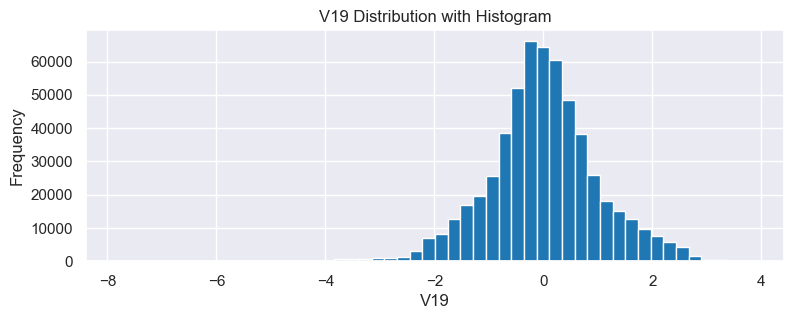

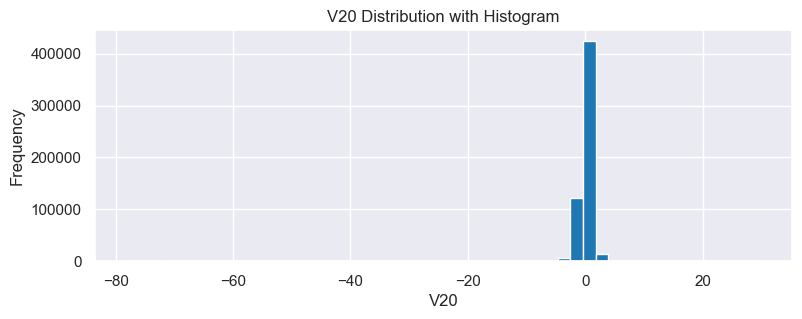

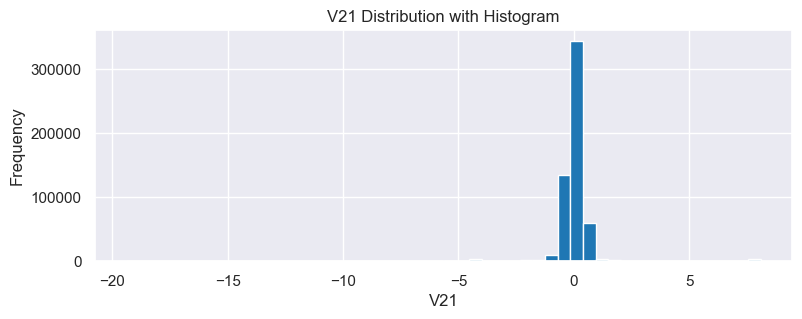

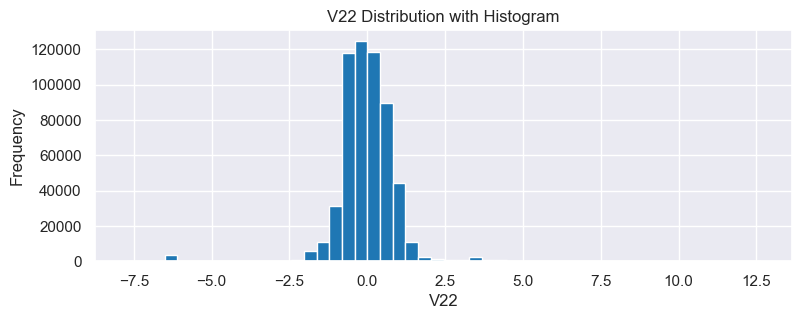

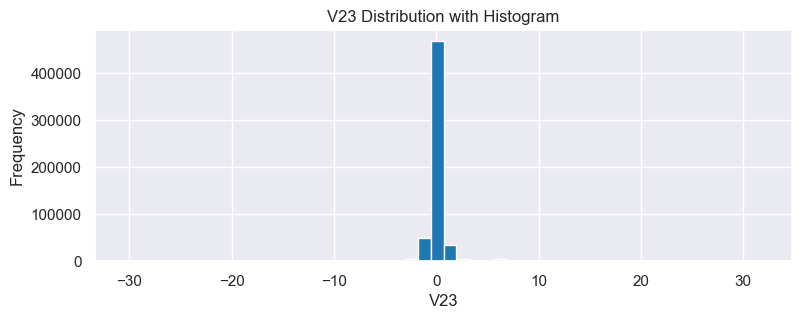

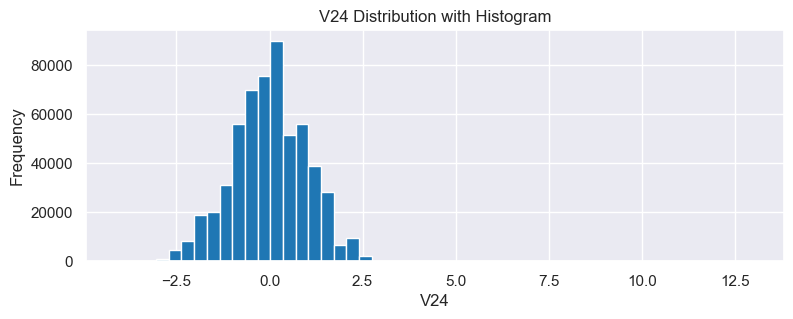

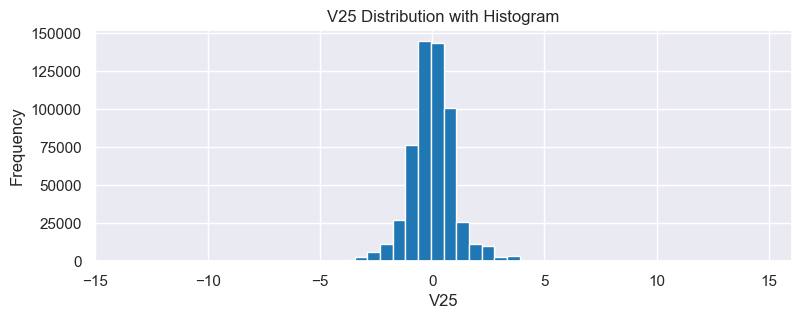

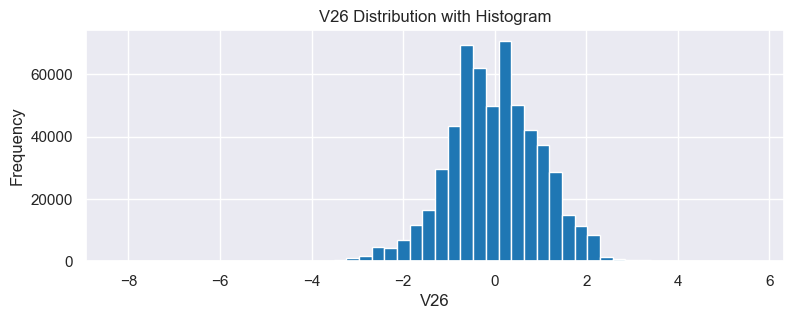

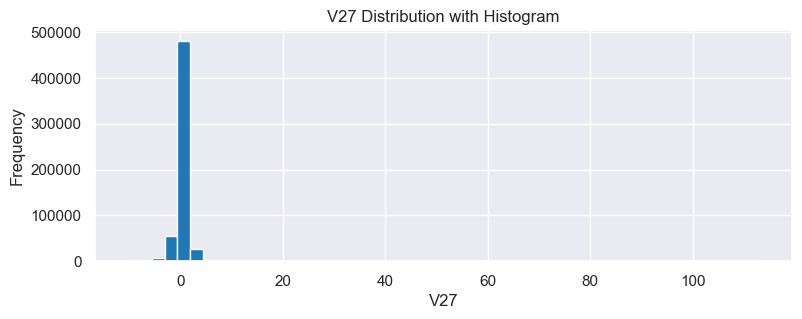

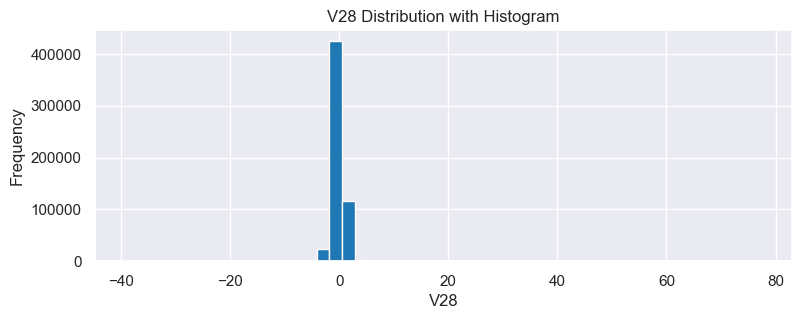

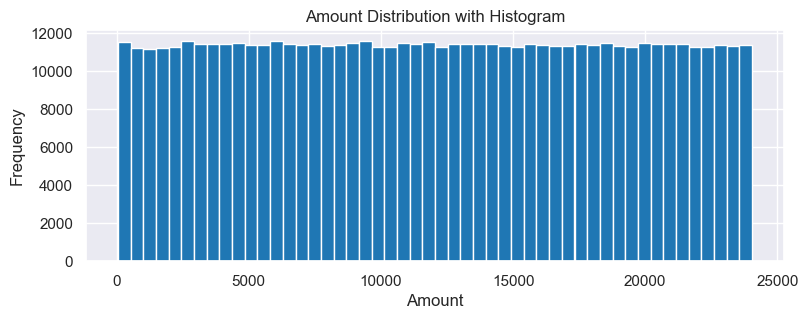

In [13]:
for n in numerical_float64_list:
    plot_hist(n)

<Axes: xlabel='Amount', ylabel='Count'>

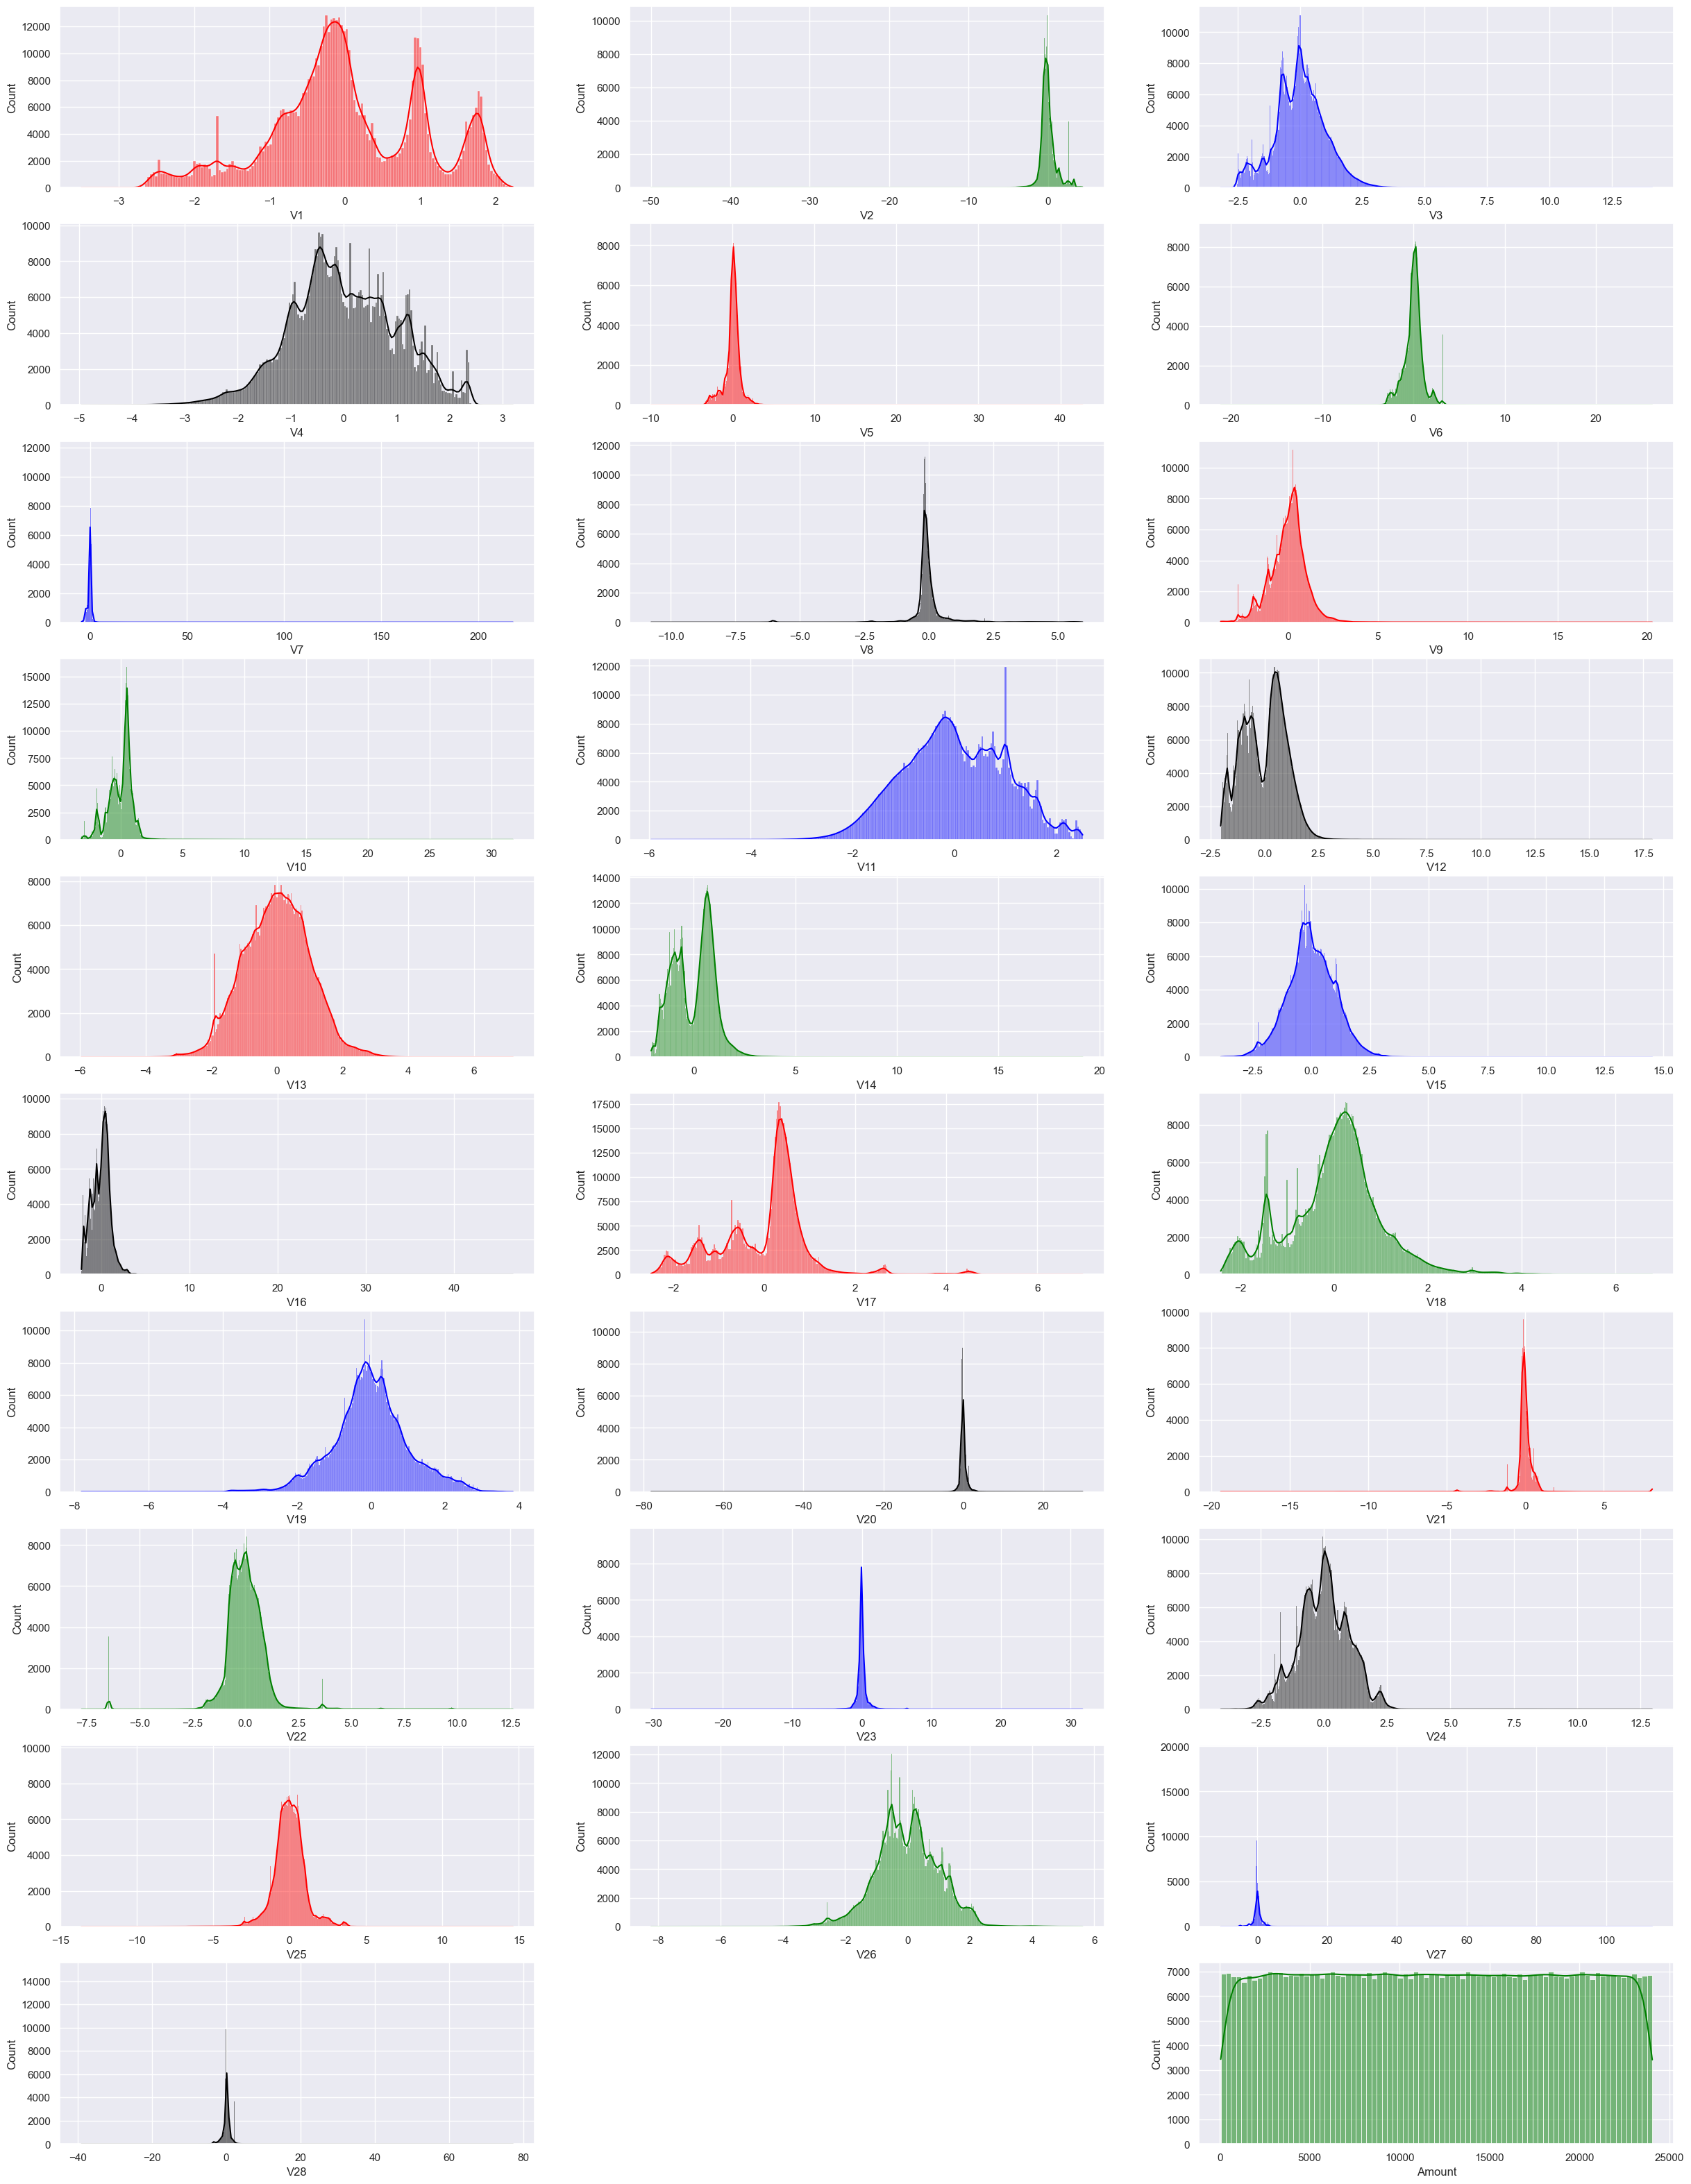

In [14]:
#Numerical variables:
#['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 
#'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

plt.figure(figsize=(30,40))

plt.subplot(10,3,1)
sns.histplot(dataset['V1'], color = 'red', kde = True)

plt.subplot(10,3,2)
sns.histplot(dataset['V2'], color = 'green', kde = True)

plt.subplot(10,3,3)
sns.histplot(dataset['V3'], kde = True, color = 'blue')

plt.subplot(10,3,4)
sns.histplot(dataset['V4'], kde = True, color = 'black')

plt.subplot(10,3,5)
sns.histplot(dataset['V5'], color = 'red', kde = True)

plt.subplot(10,3,6)
sns.histplot(dataset['V6'], color = 'green', kde = True)

plt.subplot(10,3,7)
sns.histplot(dataset[ 'V7'], kde = True, color = 'blue')

plt.subplot(10,3,8)
sns.histplot(dataset['V8'], kde = True, color = 'black')

plt.subplot(10,3,9)
sns.histplot(dataset['V9'], color = 'red', kde = True)

plt.subplot(10,3,10)
sns.histplot(dataset['V10'], color = 'green', kde = True)

plt.subplot(10,3,11)
sns.histplot(dataset['V11'], kde = True, color = 'blue')

plt.subplot(10,3,12)
sns.histplot(dataset['V12'], kde = True, color = 'black')

plt.subplot(10,3,13)
sns.histplot(dataset['V13'], color = 'red', kde = True)

plt.subplot(10,3,14)
sns.histplot(dataset['V14'], color = 'green', kde = True)

plt.subplot(10,3,15)
sns.histplot(dataset['V15'], kde = True, color = 'blue')

plt.subplot(10,3,16)
sns.histplot(dataset['V16'], kde = True, color = 'black')

plt.subplot(10,3,17)
sns.histplot(dataset['V17'], color = 'red', kde = True)

plt.subplot(10,3,18)
sns.histplot(dataset['V18'], color = 'green', kde = True)

plt.subplot(10,3,19)
sns.histplot(dataset['V19'], kde = True, color = 'blue')

plt.subplot(10,3,20)
sns.histplot(dataset['V20'], kde = True, color = 'black')

plt.subplot(10,3,21)
sns.histplot(dataset['V21'], color = 'red', kde = True)

plt.subplot(10,3,22)
sns.histplot(dataset['V22'], color = 'green', kde = True)

plt.subplot(10,3,23)
sns.histplot(dataset['V23'], kde = True, color = 'blue')

plt.subplot(10,3,24)
sns.histplot(dataset['V24'], kde = True, color = 'black')

plt.subplot(10,3,25)
sns.histplot(dataset['V25'], color = 'red', kde = True)

plt.subplot(10,3,26)
sns.histplot(dataset['V26'], color = 'green', kde = True)

plt.subplot(10,3,27)
sns.histplot(dataset['V27'], kde = True, color = 'blue')

plt.subplot(10,3,28)
sns.histplot(dataset['V28'], kde = True, color = 'black')

plt.subplot(10,3,30)
sns.histplot(dataset['Amount'], color = 'green', kde = True)

# CORRELATION

In [15]:
dataset.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259,-0.673665


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 [Text(0.5, 0, 'V1'),
  Text(1.5, 0, 'V2'),
  Text(2.5, 0, 'V3'),
  Text(3.5, 0, 'V4'),
  Text(4.5, 0, 'V5'),
  Text(5.5, 0, 'V6'),
  Text(6.5, 0, 'V7'),
  Text(7.5, 0, 'V8'),
  Text(8.5, 0, 'V9'),
  Text(9.5, 0, 'V10'),
  Text(10.5, 0, 'V11'),
  Text(11.5, 0, 'V12'),
  Text(12.5, 0, 'V13'),
  Text(13.5, 0, 'V14'),
  Text(14.5, 0, 'V15'),
  Text(15.5, 0, 'V16'),
  Text(16.5, 0, 'V17'),
  Text(17.5, 0, 'V18'),
  Text(18.5, 0, 'V19'),
  Text(19.5, 0, 'V20'),
  Text(20.5, 0, 'V21'),
  Text(21.5, 0, 'V22'),
  Text(22.5, 0, 'V23'),
  Text(23.5, 0, 'V24'),
  Text(24.5, 0, 'V25'),
  Text(25.5, 0, 'V26'),
  Text(26.5, 0, 'V27'),
  Text(27.5, 0, 'V28'),
  Text(28.5, 0, 'Amount'),
  Text(29.5, 0, 'Class')])

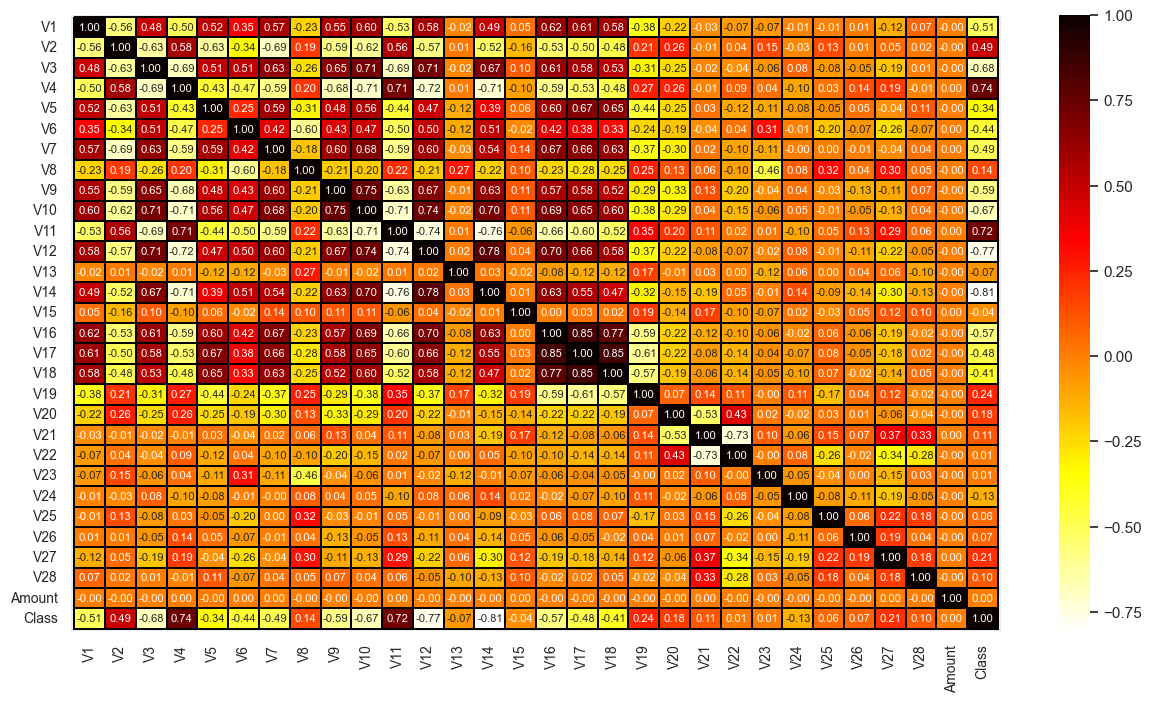

In [16]:
plt.figure(figsize=[15,8])
fig = sns.heatmap(dataset.corr(),cmap='hot_r',
            annot=True,linecolor='black',linewidths=0.01,annot_kws={"fontsize":8},fmt="0.2f")

top, bottom = fig.get_ylim()
fig.set_ylim(top+0.1,bottom-0.1)

left, right = fig.get_xlim()
fig.set_xlim(left-0.1,right+0.1) 

plt.yticks(fontsize=10,rotation=0)
plt.xticks(fontsize=10,rotation=90)

From heatmap, we can infer that V16, V17 and V18 are highly corralated with each other

# Model 1 

•	Input layer: with 29 inputs (all of the features);

•	Hidden layer (1): with 64 neurons and ReLu activation;

•	Hidden layer (2): with 1 output and sigmoid activation;

•	Optimizer: adam;

•	Training EPOCHS: 10.

FINAL RESULT: 96,05% accuracy. 

In [61]:
X1 = dataset.drop('Class',axis = 'columns')
y1 = dataset.Class

#Split data into training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [62]:
# Define neural network model

model1 = keras.Sequential()
model1.add(keras.layers.Input(shape=(29,))) 
model1.add(keras.layers.Dense(64, activation='relu'))  
model1.add(keras.layers.Dense(1, activation='sigmoid')) 


In [63]:
# compile model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# Train model
model1.fit(X1_train, y1_train, epochs=10, batch_size=32, validation_data=(X1_test, y1_test))

Epoch 1/10
14216/14216 [==============================] - 27s 2ms/step - loss: 1.2421 - accuracy: 0.9004 - val_loss: 0.4681 - val_accuracy: 0.9526
Epoch 2/10
14216/14216 [==============================] - 25s 2ms/step - loss: 1.0802 - accuracy: 0.9299 - val_loss: 0.4237 - val_accuracy: 0.9588
Epoch 3/10
14216/14216 [==============================] - 24s 2ms/step - loss: 0.9913 - accuracy: 0.9334 - val_loss: 0.4124 - val_accuracy: 0.9603
Epoch 4/10
14216/14216 [==============================] - 25s 2ms/step - loss: 0.8687 - accuracy: 0.9355 - val_loss: 0.3536 - val_accuracy: 0.9565
Epoch 5/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.6939 - accuracy: 0.9391 - val_loss: 0.3091 - val_accuracy: 0.9607
Epoch 6/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.5527 - accuracy: 0.9402 - val_loss: 2.4879 - val_accuracy: 0.8746
Epoch 7/10
14216/14216 [==============================] - 25s 2ms/step - loss: 0.4329 - accuracy: 0.9412 - val_loss: 0

In [65]:
# Evaluate model in the test set
loss, accuracy = model1.evaluate(X1_test, y1_test)
print(f'Acurácia do modelo: {accuracy}')

3554/3554 [==============================] - 4s 1ms/step - loss: 0.1137 - accuracy: 0.9605
Acurácia do modelo: 0.960483968257904


In [53]:
y1_pred = model1.predict(X1_test)

3554/3554 [==============================] - 4s 980us/step


In [66]:
#Save trained model
model1.save('modelo1_deep_learning.h5')

# MODEL 2

Same as previous model including: data shuffle and mini-batch

FINAL RESULT: 96,1% accuracy

In [67]:
from sklearn.utils import shuffle

In [69]:
X2 = dataset.drop('Class',axis = 'columns')
y2 = dataset.Class

In [70]:
# Shuffle data
X2, y2 = shuffle(X2, y2, random_state=42)

In [71]:
# Split into test and train data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


# Define mini-batch size
batch_size = 32


In [72]:
# Use DataGenerator object to create mini batches
data_generator = tf.data.Dataset.from_tensor_slices((X2_train, y2_train))
data_generator = data_generator.shuffle(buffer_size=len(X2_train))
data_generator = data_generator.batch(batch_size)

In [73]:
#Define model

model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=(29,)))  
model2.add(keras.layers.Dense(64, activation='relu'))  
model2.add(keras.layers.Dense(1, activation='sigmoid'))  


In [74]:
# Compile o model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [75]:
# Train model with mini-batches
model2.fit(data_generator, epochs=10, validation_data=(X2_test, y2_test))


Epoch 1/10
14216/14216 [==============================] - 25s 2ms/step - loss: 2.2502 - accuracy: 0.8979 - val_loss: 0.5932 - val_accuracy: 0.9559
Epoch 2/10
14216/14216 [==============================] - 27s 2ms/step - loss: 1.2440 - accuracy: 0.9293 - val_loss: 0.6135 - val_accuracy: 0.9572
Epoch 3/10
14216/14216 [==============================] - 30s 2ms/step - loss: 1.0069 - accuracy: 0.9357 - val_loss: 0.9845 - val_accuracy: 0.9474
Epoch 4/10
14216/14216 [==============================] - 31s 2ms/step - loss: 0.8719 - accuracy: 0.9375 - val_loss: 2.2441 - val_accuracy: 0.8098
Epoch 5/10
14216/14216 [==============================] - 28s 2ms/step - loss: 0.7020 - accuracy: 0.9389 - val_loss: 0.6162 - val_accuracy: 0.9515
Epoch 6/10
14216/14216 [==============================] - 29s 2ms/step - loss: 0.5674 - accuracy: 0.9415 - val_loss: 1.8163 - val_accuracy: 0.9027
Epoch 7/10
14216/14216 [==============================] - 30s 2ms/step - loss: 0.4359 - accuracy: 0.9421 - val_loss: 1

In [76]:
# Check accuracy with test set
loss, accuracy = model2.evaluate(X2_test, y2_test)
print(f'Acurácia do modelo: {accuracy}')


3554/3554 [==============================] - 5s 1ms/step - loss: 0.1097 - accuracy: 0.9610
Acurácia do modelo: 0.961011528968811


In [47]:
y_pred = model2.predict(X_test)


3554/3554 [==============================] - 3s 921us/step


In [48]:
# Save trained model
model2.save('model2_deep_learning.h5')

# MODEL 3 

• Input layer: with 29 inputs (all of the features).

• Hidden layer (1): with 64 neurons and ReLu activation.

• Hidden layer (2): with 128 neurons and ReLu activation.

• Hidden layer (3): with 64 neurons and ReLu activation.

• Hidden layer (4): with 32 output and ReLu activation.

• Output layer: with 1 output and sigmoid activation.

• Optimizer: adam.

• Mini-batches for training.

• Data shuffle for training.

• Training EPOCHS: 30.

In [78]:
X3 = dataset.drop('Class',axis = 'columns')
y3 = dataset.Class
X3, y3 = shuffle(X3, y3, random_state=42)

In [79]:
# Dividir os dados em conjuntos de treinamento e teste
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Definir o tamanho do mini-lote
batch_size = 32

In [80]:
# Usar um objeto de DataGenerator para criar mini-lotes
data_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_generator = data_generator.shuffle(buffer_size=len(X_train))
data_generator = data_generator.batch(batch_size)

In [83]:
# Definir o modelo da rede neural com 4 camadas ocultas
model3 = keras.Sequential()
model3.add(keras.layers.Input(shape=(29,)))  # Camada de entrada com 29 características
model3.add(keras.layers.Dense(64, activation='relu'))  # Primeira camada oculta com 64 neurônios e ativação ReLU
model3.add(keras.layers.Dense(128, activation='relu'))  # Segunda camada oculta com 128 neurônios e ativação ReLU
model3.add(keras.layers.Dense(64, activation='relu'))  # Terceira camada oculta com 64 neurônios e ativação ReLU
model3.add(keras.layers.Dense(32, activation='relu'))  # Quarta camada oculta com 32 neurônios e ativação ReLU
model3.add(keras.layers.Dense(1, activation='sigmoid'))  # Camada de saída com 1 neurônio e ativação sigmoid


In [84]:
# Compilar o modelo
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [85]:
# Treinar o modelo com mini-lotes
model3.fit(data_generator, epochs=30, validation_data=(X3_test, y3_test))


Epoch 1/30
14216/14216 [==============================] - 35s 2ms/step - loss: 1.2565 - accuracy: 0.8683 - val_loss: 0.1307 - val_accuracy: 0.9498
Epoch 2/30
14216/14216 [==============================] - 32s 2ms/step - loss: 0.1436 - accuracy: 0.9481 - val_loss: 0.1134 - val_accuracy: 0.9588
Epoch 3/30
14216/14216 [==============================] - 33s 2ms/step - loss: 0.1277 - accuracy: 0.9534 - val_loss: 0.1272 - val_accuracy: 0.9587
Epoch 4/30
14216/14216 [==============================] - 33s 2ms/step - loss: 0.1212 - accuracy: 0.9553 - val_loss: 0.1194 - val_accuracy: 0.9596
Epoch 5/30
14216/14216 [==============================] - 34s 2ms/step - loss: 0.1172 - accuracy: 0.9568 - val_loss: 0.1055 - val_accuracy: 0.9585
Epoch 6/30
14216/14216 [==============================] - 34s 2ms/step - loss: 0.1143 - accuracy: 0.9574 - val_loss: 0.1034 - val_accuracy: 0.9594
Epoch 7/30
14216/14216 [==============================] - 33s 2ms/step - loss: 0.1136 - accuracy: 0.9576 - val_loss: 0

In [86]:

# Avaliar o modelo no conjunto de teste
loss, accuracy = model3.evaluate(X3_test, y3_test)
print(f'Acurácia do modelo: {accuracy}')

3554/3554 [==============================] - 5s 1ms/step - loss: 0.0978 - accuracy: 0.9621
Acurácia do modelo: 0.9621458649635315


In [87]:
y3_pred = model3.predict(X3_test)

3554/3554 [==============================] - 4s 1ms/step


In [ ]:
# Save trained model
model3.save('model3_deep_learning.h5')